# QUESTION 1.
* Consider example 8.3 of Yahya’s textbook that was discussed in class; it
had a specified supersonic inlet, sonic outlet and pre-shock Mach number, and you were asked to find the lengths of the duct upstream and downstream of the shock. Now consider the related, and more practical, problem, where you are given the length of the duct and the inlet (supersonic) Mach number, and told that the outlet is sonic. Write a code to find the location of the normal shock in the duct, if it exists. Show that it reproduces the solution of the example problem. Also exercise your code by making up some other problems. Do you find situations where your code fails to produce any answer? Why?

#  Imports Libraries:

* numpy is imported as np, i.e useful for numerical operations (e.g., arrays, mathematicalfunctions).

* Here we use it for log and sqare root functions

# Taking Inputs from user:

* L - length of the tube
* M1- Mach number of the flow at the inlet
* M2 - Mach number of the flow at the outlet
* g - gamma Value
* D - Diameter of the tube
* f - Frictional factor of the tube

# Functions:

* My - To find the mach number of flow behind the normal shock for a given mach number
* ld - To find 4*f*L/d Value for for given mach number

# Looping:

* Lists to store the values of torrelence and mach number corresponding
* looping by guessing the value of Mx
* Finding L1 - length of shock from inlet
* Finding My - mach number after the shock
* Finding L2 - length of shock from outlet
* Finding torr - Torrelence or Error in the values of length
* Appending the values to the respective lists
* M2 - Mach number manual incremented can be part of the loop

# Segregating the minimum value of torrelence :

* I is the corresponding index of the minimum value of torrelence
* Min is the minimum value of torrelence
* Mach is the mach number corresponding to the minimum value of torrelence

# Results:

* Using the minimum values Getting the values of L1,L2,Mach ( Already found )

* Using only torrelence value it coverges , but something in the negative or in positive it fluctuates , so the above code just finds without it.

# Limitations or Code fails:

* Every length of pipe has a certain range of mach number for which it can produce a shock , when it fails gives negative values. Which corresponding to need for change in the upstream values , the code will give results but which are physically not possible.

* For a Mach number shock can only be produced ,if the L* for the mach number is more than L . So not the shock cannot be produced.

* Mach number should be supersonic, other wise no shock.

* Area should be corresponding area in which the shock can be formed.


In [ ]:
import numpy as np # importing Numpy library

L = 10.8   #length of the tube
M1= 2    # Mach number of the flow at the inlet
M2 =1    # Mach number of the flow at the outlet
g=1.3    # gamma Value
D=0.3    # Diameter of the tube
f=0.003  # Frictional factor of the tube

#assuming mx

# Finding the M2 value for a Given M1 in a normal shock

def My(Mx):
   M = np.sqrt((1+(g-1)/2*Mx**2)/(g*Mx**2-(g-1)/2))
   return M

# Finding the 4fl/d Value of a Given Mach number

def ld(M):
   l = (1-M**2)/(g*M**2)+(g+1)/(2*g)*np.log((g+1)*M**2/(2+(g-1)*M**2))
   return l

#List to hold Values
torrs=[] #List to hold torrelence error values
M = []  #List to hold the corresponding torrelence values

# A loop to find the torrelence and mach number values for a set of mach number values (GUESSING MX)

for i in range(1001):

    L1 = (ld(M1)-ld(M2))/f*D/4 #L1 - length of shock from inlet
    my = My(M2) # My - mach number after the shock
    L2 = ld(my)/f*D/4 # L2 - lenght of shock from outlet
    torr = L-(L1+L2) # Torrelence or Error in the values of length
    torrs.append(abs(torr)) # Appending the absolute value of the torrelence error values
    M.append(M2) #Appending the corresponding value of mach numbers
    M2+=0.001 # Mach number manual incremented can be part of the loop
    # Rounding of the mach number to three digit can be run without it


#segregating the minimum value of torrelence

I = torrs.index(min(torrs)) # I is the corresponding index of the minimum value of torrelence
Min = min(torrs) # Min is the minimum value of torrelence
Mach = M[torrs.index(min(torrs))] # Mach is the mach number corresponding to the minimum value of torrelence

#using the minimum values Getting the values of L1,L2,Mach( Already found )

L1 = (ld(M1)-ld(Mach))*D/(4*f)
my = My(Mach)
L2 = ld(my)/f*D/4

print('L1 =',L1 ,'L2 =',L2,'Mach =',round(Mach,3))


# # Using only torrelence value it coverges , but something in the  negative in positive it fluctuates , so the above code just finds
# the minimum torrelence value #

# for j in range(20):

#    for i in range(1001):

#       L1 = round((ld(M1)-ld(M2))/f*D/4,3)
#       my = round(My(M2),2)
#       L2 = round(ld(my)/f*D/4,3)
#       torr = j-(L1+L2)

#       if(abs(torr)<=0.01):
#          print(L1,L2,M2)

#       M2+=0.001
#       M2 = round(M2,3)



# EXAMPLES  L = 20, M1 = 3


L1 = 5.351653153714707 L2 = 5.446923503133028 Mach = 1.469


# QUESTION 2:
* Interaction of shocks of opposite families: Write a code (and run it) to solve Example 6.5 of Oosthuizen’s textbook (which has a mistake towards the end of the solution). Find and solve similar examples from other textbooks/references to validate your code.

#  Imports Libraries:

* numpy is imported as np, i.e useful for numerical operations (e.g., arrays, mathematicalfunctions).
*scipy library importing fsolve modules it finds the roots of a system of equations, which means it attempts to find a value where a given function returns zero.

#  Defining Constants:

*  GAMMA-----Ratio of specific heats (Cp/Cv) for air.

*  Cp-----Specific heat at constant pressure, 1005 J/(kg·K).

* R-----Specific gas constant for air, 287 J/(kg·K).

#  Taking Inputs from user:

*   Upsteram Mach Number , Pressure and Temperature and wedge angle 1 and 2.

#  Creating a function to calculate Beta:

  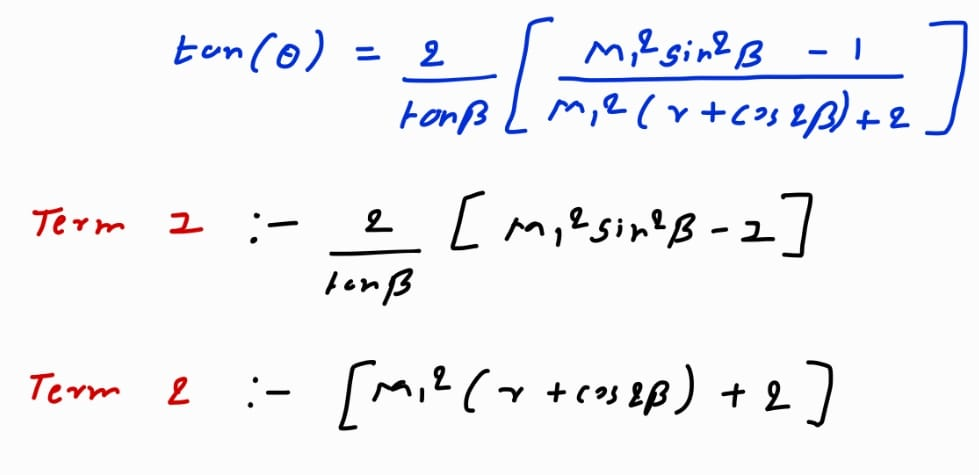
* Checking the difference between the calculated theta value and actual theta value.
* Giving initial guess of Beta.


#  Calculating BETA angle Using fsolve:

*  Using the fsolve fuction and above defined Beta function to calculate the actual value of beta for particular Mach Number and Theta value.

#   Property calculation across OSW.

*  Creating four function i.e NORMAL COMPONENT OF Upsteam and Downstream Mach Number, Downstream Mach Number and Pressure Ratio.

#   Finding The Value Of DELTA.

*  DELTA is the angle slipstream makes such that flow above and below it be parallel to each other.
*  There are two functions one fuction running inside the other, the inside function works to check the difference between the pressure ratio, this whole loop will continue till the difference comes to zero,for this difference to be zero there will be particular value of delta. This is how the value of delta is being calculated.











In [ ]:
'''QUESTION 2. Interaction of shocks of opposite families: Write a code (and run it) to solve Example 6.5 of Oosthuizen’s textbook
(which has a mistake towards the end of the solution). Find and solve similar examples from other textbooks/references to validate your code.'''

#   Importing Required Modules

import numpy as np
from scipy.optimize import fsolve

#   Defining Constants

GAMMA = 1.4  #   Specific Heat Ratio
Cp = 1005   # J/(kg*K)
R = 287     # J/(kg*K)

#   Inputs (Mach Number, Pressure and Temperature Upstream of shock) (Wedge angle)

M1 = float(input("Enter Upstream Mach Number: "))
P1 = float(input("Enter Upstream Pressure: "))  # Pa
T1 = float(input("Enter Upstream Temperature: "))  # K

theta_1 = float(input("Enter the Wedge Angle 1 (in degrees): "))  # Degree
theta_2 = float(input("Enter the Wedge Angle 2 (in degrees): "))  # Degree

#   Convert angles to radians

theta_1_rad = np.radians(theta_1)
theta_2_rad = np.radians(theta_2)

#   Function to calculate the difference between actual and calculated theta

def Beta_Angle(beta, M, theta_1, GAMMA):
    # Theta-Beta-M relation ( Parted the original equation into two halves for the ease of coding. )
    if M > 1:
        term1 = 2 * (1 / np.tan(beta)) * (M ** 2 * np.sin(beta) ** 2 - 1)
        term2 = M ** 2 * (GAMMA + np.cos(2 * beta)) + 2
        theta_calc = np.arctan(term1 / term2)  # Calculated deflection angle
        return theta_calc - theta_1  # The iteration will continue till this difference is zero.
    else:
        return 0

# Initial guess for beta in radians i.e 20 or 25 or 15

beta_initial_guess = np.radians(25)

# Calculating BETA angle Using fsolve, i.e ITERATIVE METHOD.

beta_solution_rad1 = fsolve(Beta_Angle, beta_initial_guess, args=(M1, theta_1_rad, GAMMA))[0]
beta_solution_rad2 = fsolve(Beta_Angle, beta_initial_guess, args=(M1, theta_2_rad, GAMMA))[0]

# Converting the calculated BETA angles into degrees.

beta_solution_deg1 = np.degrees(beta_solution_rad1)
beta_solution_deg2 = np.degrees(beta_solution_rad2)
print(f"For θ = {theta_1} degrees and M = {M1}, the corresponding β is approximately {beta_solution_deg1:.2f} degrees.")
print(f"For θ = {theta_2} degrees and M = {M1}, the corresponding β is approximately {beta_solution_deg2:.2f} degrees.")

#   Property calculation across OSW.

def calculate_Mn12(beta_solution_rad1,M,GAMMA):    # Calculating Normal component of Upstream Mach number.
    Mn1 = M1*np.sin(beta_solution_rad1)
    return Mn1

Mn12 = calculate_Mn12(beta_solution_rad1,M1,GAMMA)
Mn13 = calculate_Mn12(beta_solution_rad2,M1,GAMMA)
# print(f"For θ = {theta_1} degrees,Beta = {beta_solution_deg1} and Upstream Mach Number = {M1}, the corresponding Normal component of Upstream Mach number is approximately {Mn12}.")
# print(f"For θ = {theta_2} degrees,Beta = {beta_solution_deg2} and Upstream Mach Number = {M1}, the corresponding Normal component of Upstream Mach number is approximately {Mn13}.")
def calculate_Mn2(beta_solution_rad1,M1,GAMMA, Mn):   # Calculating Normal component of Downstream Mach number.
    Mn2 = (((2+(GAMMA-1)*(Mn)**2)/((2*GAMMA*(Mn)**2)-(GAMMA-1)))**0.5)
    return Mn2

Mn2 = calculate_Mn2(beta_solution_rad1,M1,GAMMA, Mn12)
Mn3 = calculate_Mn2(beta_solution_rad2,M1,GAMMA, Mn13)
# print(f"For θ = {theta_1} degrees,Beta = {beta_solution_deg1} and Upstream Mach Number = {M1}, the corresponding Normal component of Downstream Mach number is approximately {Mn2}.")
# print(f"For θ = {theta_2} degrees,Beta = {beta_solution_deg2} and Upstream Mach Number = {M1}, the corresponding Normal component of Downstream Mach number is approximately {Mn3}.")
def calculate_P2_P1(beta_solution_rad1,M,GAMMA, Mn):     #   Calculating Pressure ratio across Shock Number 1, i.e region 1-2.
    Pre_ratio = (2*GAMMA*Mn**2-(GAMMA-1))/(GAMMA+1)
    return Pre_ratio

P2_P1 = calculate_P2_P1(beta_solution_rad1,M1,GAMMA, Mn12)
P3_P1 = calculate_P2_P1(beta_solution_rad2,M1,GAMMA, Mn13)
print(f"For θ = {theta_1} degrees,Beta = {beta_solution_deg1} and Upstream Mach Number = {M1}, the corresponding Pressure Ratio across OSW is approximately {P2_P1}.")
print(f"For θ = {theta_2} degrees,Beta = {beta_solution_deg2} and Upstream Mach Number = {M1}, the corresponding Pressure Ratio across OSW is approximately {P3_P1}.")
def calculate_M2(beta_solution_rad,M,GAMMA,Mn,theta_rad):      #   Calculating Downstream Mach Number across OSW 1.
    M2 =  Mn/np.sin(beta_solution_rad-theta_rad)
    return M2

M2 = calculate_M2(beta_solution_rad1,M1,GAMMA,Mn2,theta_1_rad)
M3 = calculate_M2(beta_solution_rad2,M1,GAMMA,Mn3,theta_2_rad)
# print(f"For θ = {theta_1} degrees,Beta = {beta_solution_deg1} and Upstream Mach Number = {M1}, the corresponding Downstream Mach Number is approximately {M2}.")
# print(f"For θ = {theta_2} degrees,Beta = {beta_solution_deg2} and Upstream Mach Number = {M1}, the corresponding Downstream Mach Number is approximately {M3}.")

#   Finding The Value Of DELTA (Change in angle required after shock reflection) Using fsolve.

def Calculate_delta(GAMMA,Mreq1,Mreq2):
    def delta_function(DELTA):
        theta_42 = theta_1_rad - DELTA      #   Wedge Angle across region 2-4
        theta_43 = theta_2_rad + DELTA      #   Wedge Angle across region 3-4

        beta_42 = fsolve(Beta_Angle,np.radians(20), args=(M2,theta_42,GAMMA))[0]        #   Shock Angle across region 2-4
        beta_43 = fsolve(Beta_Angle,np.radians(20), args=(M3,theta_43,GAMMA))[0]        #   Shock Angle across region 2-4

        # print(f"For θ = {theta_42} degrees and M = {M2}, the corresponding β is approximately {np.degrees(beta_42):.2f} degrees.")
        # print(f"For θ = {theta_43} degrees and M = {M3}, the corresponding β is approximately {np.degrees(beta_43):.2f} degrees.")

        #   Property calculation across shock for region 4-2
        Mn42 = M2 * np.sin(beta_42)
        P42_P2 = (2*GAMMA*Mn42**2-(GAMMA-1))/(GAMMA+1)
        P42 = P42_P2*P2_P1*P1
        # print(f"The pressure P42 is {P42} Pa.")
        #   Property calculation across shock for region 4-3
        Mn43 = M3 * np.sin(beta_43)
        P43_P3 = (2 * GAMMA * Mn43** 2 - (GAMMA - 1)) / (GAMMA + 1)
        P43 = P43_P3*P3_P1*P1
        # print(f"The pressure P43 is {P43} Pa.")

        return (P42_P2 * P2_P1) - (P43_P3 * P3_P1)

    delta_initial_guess = np.radians(0.5)
    delta_solution = fsolve(delta_function,delta_initial_guess)[0]
    return delta_solution

delta_rad = Calculate_delta(GAMMA,M2,M3)
delta_deg = np.degrees(delta_rad)

print(f"Change in angle after shock reflection required to have P42 = P43 is = {delta_deg} degrees.")

###     VALIDATION EXAMPLE 6.13 RATHAKRISHNAN theta_1= 10, theta_2 = 5, M1 = 2.

Enter Upstream Mach Number: 3
Enter Upstream Pressure: 30000
Enter Upstream Temperature: 264
Enter the Wedge Angle 1 (in degrees): 4
Enter the Wedge Angle 2 (in degrees): 3
For θ = 4.0 degrees and M = 3.0, the corresponding β is approximately 22.35 degrees.
For θ = 3.0 degrees and M = 3.0, the corresponding β is approximately 21.60 degrees.
For θ = 4.0 degrees,Beta = 22.35442157800481 and Upstream Mach Number = 3.0, the corresponding Pressure Ratio across OSW is approximately 1.352206098204202.
For θ = 3.0 degrees,Beta = 21.598966913995095 and Upstream Mach Number = 3.0, the corresponding Pressure Ratio across OSW is approximately 1.2561184414171016.
Change in angle after shock reflection required to have P42 = P43 is = 0.999525649621178 degrees.


#QUESTION 3:
*  Shock expansion theory: Write a code (and run it) to solve Example 4.15 of Anderson (2003) involving calculation of supersonic flow over a flat plate using shock-expansion theory. Calculate the cl and cd. Also, calculate the precise slip-line angle (see Fig. 4.37 of the book). Find similar examples from other textbooks/references to validate your code.

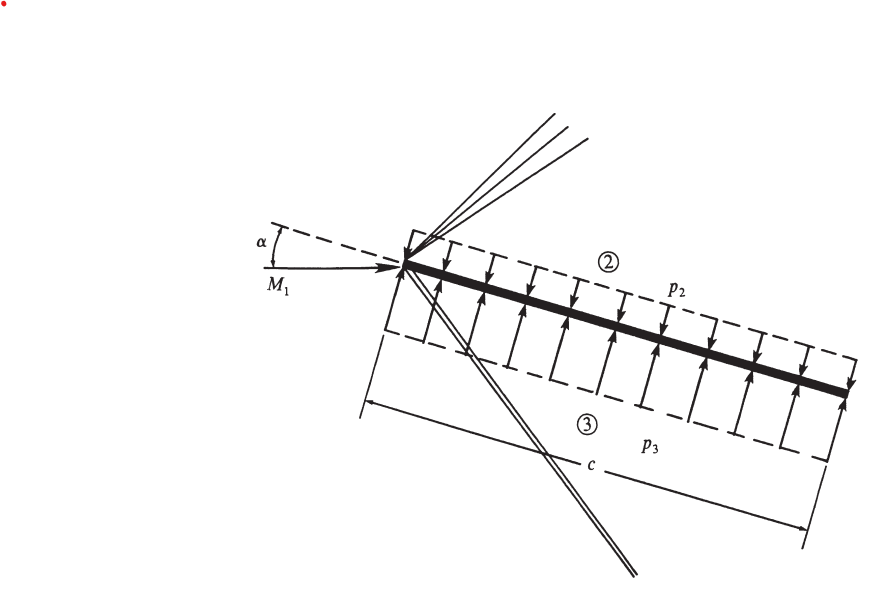

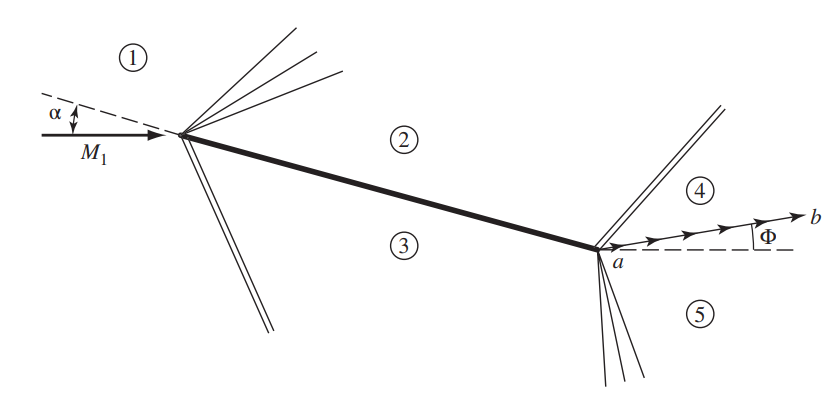
#  Imports Libraries:

* numpy is imported as np, i.e useful for numerical operations (e.g., arrays, mathematicalfunctions).
*fsolve it finds the roots of a system of equations, which means it attempts to find a value where a given function returns zero.

#  Defining Constants:

*  GAMMA-----Ratio of specific heats (Cp/Cv) for air.

*  Cp-----Specific heat at constant pressure, 1005 J/(kg·K).

* R-----Specific gas constant for air, 287 J/(kg·K).

#  Taking Inputs from user:

*   Upsteram Mach Number , Pressure and Temperature and Angle of Attack.

#  Creating function to calulate Prandtl Mayer Function:

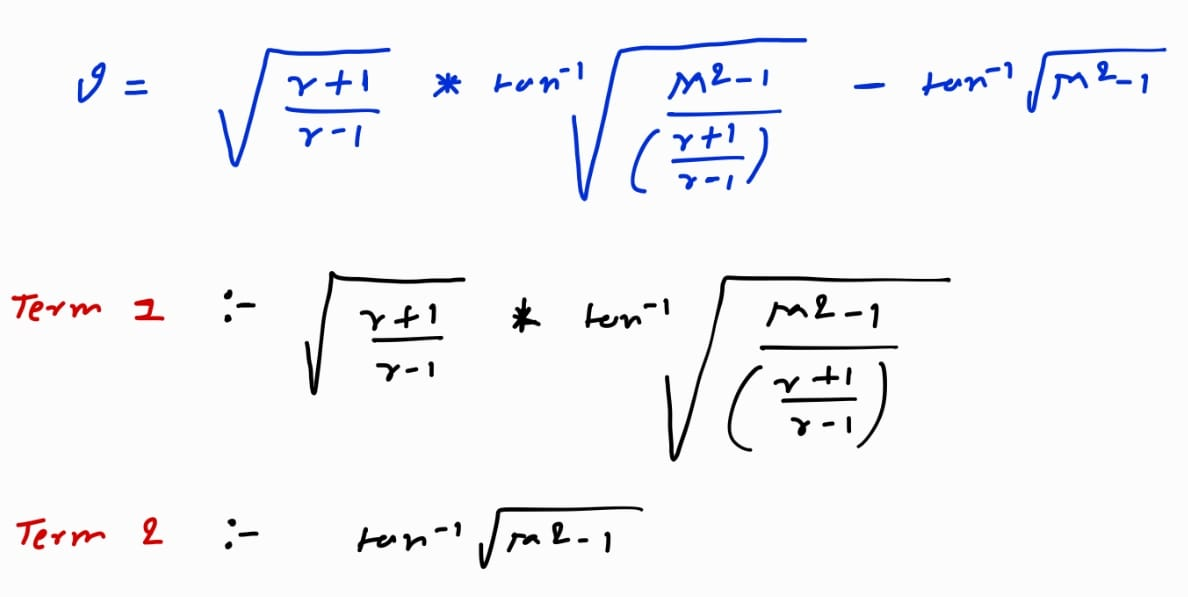

#  Creating a function to calculate Mach Number:

*   Calculating the value of actual Mach Number using fsolve function.

#  Calculating Properties across Expansion Fan and Oblique Shock Wave

#   Finding The Value Of DELTA.

*  DELTA is the angle slipstream makes such that flow above and below it be parallel to each other.
*  There are two functions one fuction running inside the other, the inside function works to check the difference between the pressure ratio, this whole loop will continue till the difference comes to zero,for this difference to be zero there will be particular value of delta. This is how the value of delta is being calculated.



In [ ]:
'''QUESTION 3. Shock expansion theory: Write a code (and run it) to solve Example 4.15 of Anderson (2003) involving calculation of supersonic flow over a flat plate using shock-expansion theory. Calculate the cl and cd. Also, calculate the precise slip-line angle (see Fig. 4.37 of the book). Find similar examples from other textbooks/references to validate your code.'''

#   Importing Required Modules

import numpy as np
from scipy.optimize import fsolve

#   Defining Constants

GAMMA = 1.4  #   Specific Heat Ratio
Cp = 1005   # J/(kg*K)
R = 287     # J/(kg*K)

#   Inputs (Mach Number, Pressure and Temperature Upstream of shock)

ALPHA = float(input("Enter flat plate Angle of Attack: "))    # DEGREES
M1 = float(input("Enter free stream Mach Number: "))
T1 = float(input("Enter Upstream Temperature: "))  # K
P1 = float(input("Enter Upstream Pressure: "))  # Pa
# Length = float(input("Enter the Length of Flat Plate: ")) # Meter

ALPHA_rad = np.radians(ALPHA)
P01 =((1+((GAMMA-1)/2)*((M1**2)))**((GAMMA)/(GAMMA-1)))*P1   # TOTAL PRESSURE
TO1 = (1+((GAMMA-1)/2)*((M1**2)/2))* T1     #  TOTAL TEMPERATURE

#     CALCULATION FOR-----EXPANSION FAN

def Prndtl_Mayer_Function(M,GAMMA):
    # Theta-Beta-M relation ( Parted the original into two halves for the ease of coding. )......check in text file*
    if M > 1:
        term1 = (((GAMMA+1)/(GAMMA-1))**0.5) * np.arctan((((GAMMA-1)/(GAMMA+1))*((M**2)-1))**0.5)
        term2 = np.arctan(((M**2)-1)**0.5)
        v = np.degrees(term1 - term2)      # DEGREE
        return v
    else:
        return 0

v1 = Prndtl_Mayer_Function(M1,GAMMA)
print(f"For M1 = {M1}, Corresponding Prandtl Mayer Function Is {v1:.1f} degrees.")
v2 = v1 + ALPHA     # DEGREES
print(f"PRANDTL MAYER FUNCTION AFTER THE FAN IS {v2:.1f} degrees")
def Mach_calculation(MACH, GAMMA,v2):
    v_calc = Prndtl_Mayer_Function(MACH,GAMMA)
    return (v_calc) - v2


M2 = fsolve(Mach_calculation,2, args=(GAMMA,v2))[0]
print(f"For v2 = {v2:.1f} degrees, CORRESPONDING MACH NUMBER IS {M2:.1f}.")

#       PROPERTY RATIO ACROSS FAN

P01_P1 = (1+((GAMMA-1)/2)*M1**2)**((GAMMA)/(GAMMA-1))
P02_P2 = (1+((GAMMA-1)/2)*M2**2)**((GAMMA)/(GAMMA-1))
# print(f"(P01/O1) IS {P01_P1}")
# print(f"(P02/O2) IS {P02_P2}")
#   FLOW ACROSS EXPANSION FAN IS ISENTROPIC
P02 = P01
P2_P1 = (1/P02_P2)*(P02/P01)*(P01_P1)
P2 = P2_P1 * P1
print(f"Pressure ratio across Expansion Fan = {P2_P1}")

###     CALCULATION FOR-----OSW

def Beta_Angle(beta, M, ALPHA, GAMMA):
    # Theta-Beta-M relation( Parted the original into two halves for the ease of coding. )
    term1 = 2 * (1 / np.tan(beta)) * (M**2 * np.sin(beta)**2 - 1)
    term2 = M**2 * (GAMMA + np.cos(2 * beta)) + 2
    theta_calc = np.arctan(term1 / term2)  # Calculated deflection angle
    return theta_calc - ALPHA   # Return the difference from the given theta(ALPHA)

beta_rad = fsolve(Beta_Angle, np.radians(20), args=(M1, ALPHA_rad, GAMMA))[0]
Beta_deg = np.degrees(beta_rad)
print(f"For M1 = {M1} ,AND THETA(ALPHA) = {ALPHA} DEGREE, CORRESPONDING BETA IS {Beta_deg:.1f} DEGREE.")

Mn1 = M1*np.sin(beta_rad)
P3_P1 = (2*GAMMA*Mn1**2-(GAMMA-1))/(GAMMA+1)
P3 = P3_P1 * P1
print(f"Pressure ratio across OSW = {P3_P1}")
Mn3 = ((2+(GAMMA-1)*Mn1**2)/((2*GAMMA*Mn1**2)-(GAMMA-1)))**0.5
M3 = Mn3/np.sin(beta_rad-ALPHA_rad)
RHO3_RHO1 = ((GAMMA+1)*Mn1**2)/(2+(GAMMA-1)*Mn1**2)
P03_P01 = ((RHO3_RHO1)**(GAMMA/(GAMMA-1)))/((P3_P1)**(1/(GAMMA-1)))

LIFT_COEFFICIENT = (2/(GAMMA*M1**2))*((P3_P1)-(P2_P1))*np.cos(ALPHA_rad)
print(f"Lift Coefficient = {LIFT_COEFFICIENT:.3f}")
DRAG_COEFFICIENT = (2/(GAMMA*M1**2))*((P3_P1)-(P2_P1))*np.sin(ALPHA_rad)
print(f"Drag Coefficient = {DRAG_COEFFICIENT:.2f}")

# LIFT_FORCE_PER_METER_SPAN = (P3-P2)*Length*np.cos(ALPHA_rad)
# print(f"LIFT_FORCE_PER_METER_SPAN = {LIFT_FORCE_PER_METER_SPAN:.3f} N/m")
# DRAG_FORCE_PER_METER_SPAN = (P3-P2)*Length*np.sin(ALPHA_rad)
# print(f"DRAG_FORCE_PER_METER_SPAN = {DRAG_FORCE_PER_METER_SPAN:.3f} N/m")

#   Finding The Value Of DELTA (Change in angle required) Using fsolve.

def Calculate_delta(GAMMA,Mreq1,Mreq2):
    def delta_function(DELTA):
        theta = ALPHA_rad + DELTA

        #   FAN TO SHOCK
        beta_42 = fsolve(Beta_Angle,np.radians(20), args=(M2,theta,GAMMA))[0]
        Mn42 = M2 * np.sin(beta_42)

        P42_P2 = (2 * GAMMA * (Mn42 ** 2) - (GAMMA - 1)) / (GAMMA + 1)
        P42_P1 = P42_P2*P2_P1


        #   SHOCK TO FAN
        v3 = Prndtl_Mayer_Function(M3,GAMMA)
        v5 = np.degrees(theta + np.radians(v3))
        M5 = fsolve(Mach_calculation, 2, args=(GAMMA, v5))[0]
        P05_P5 = (1 + ((GAMMA - 1) / 2) * M5 ** 2) ** ((GAMMA) / (GAMMA - 1))
        # P05 = P03
        P5_P1 = (1/P05_P5)*(P03_P01)*(P01_P1)
        return P5_P1 - P42_P1


    delta_solution = fsolve(delta_function,np.radians(0))[0]
    return delta_solution

delta_rad = Calculate_delta(GAMMA,M2,M3)
delta_deg = np.degrees(delta_rad)

print(f"Change in angle after shock reflection required to have P5_P1 - P42_P1 = 0,  is = {delta_deg:.3f} degrees.")

###     VALIDATION EXAMPLE 6.14 RATHAKRISHNAN ALPHA = 15, M1 = 2.4
###     VALIDATION EXAMPLE 7.4  OOSTHUIZEN ALPHA = 3, M1 = 2.5, LENGTH = 0.25

Enter flat plate Angle of Attack: 5
Enter free stream Mach Number: 2.6
Enter Upstream Temperature: 273
Enter Upstream Pressure: 101325
For M1 = 2.6, Corresponding Prandtl Mayer Function Is 41.4 degrees.
PRANDTL MAYER FUNCTION AFTER THE FAN IS 46.4 degrees
For v2 = 46.4 degrees, CORRESPONDING MACH NUMBER IS 2.8.
Pressure ratio across Expansion Fan = 0.6999509835964806
For M1 = 2.6 ,AND THETA(ALPHA) = 5.0 DEGREE, CORRESPONDING BETA IS 26.4 DEGREE.
Pressure ratio across OSW = 1.3941570248460031
Lift Coefficient = 0.146
Drag Coefficient = 0.01
Change in angle after shock reflection required to have P5_P1 - P42_P1 = 0,  is = 0.003 degrees.
